In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

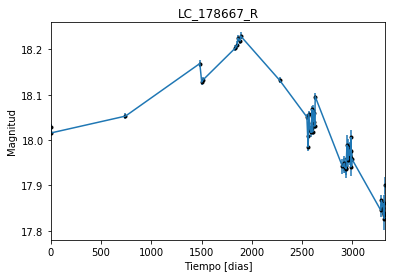

In [2]:
data = np.genfromtxt('LC_178667_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_178667_R')
plt.savefig("LC_178667_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

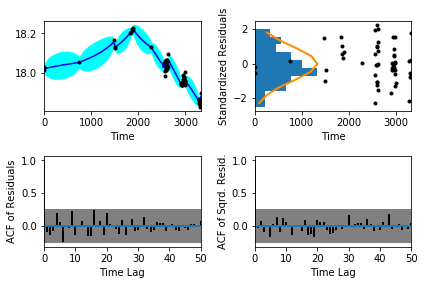

In [5]:
sample.assess_fit()

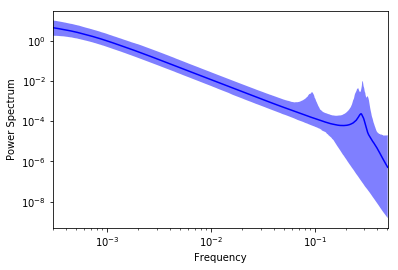

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

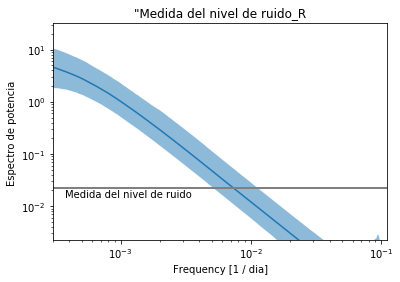

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_178667_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_178667_R')

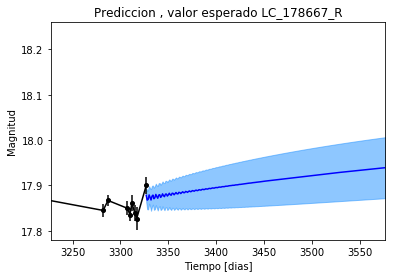

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_178667_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_178667_R')

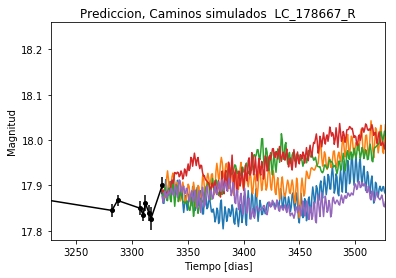

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_178667_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


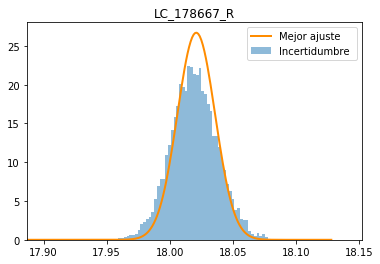

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_178667_R')
plt.savefig("Mejor_ajuste_LC_178667_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_178667_R')

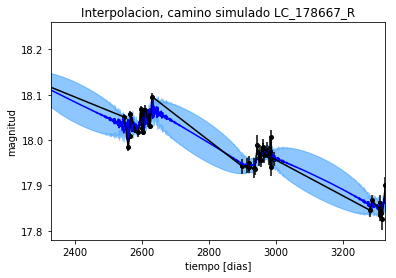

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_R')

Text(0.5,1,'Interpolacion, camino simulado LC_178667_R')

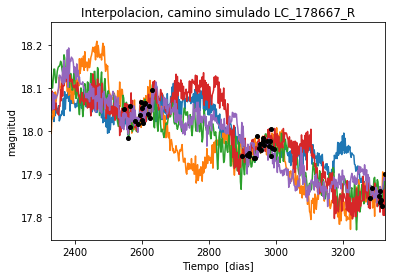

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 579.23345104
Median: 0.0064523564079
Standard deviation: 0.0299968269036
68% credibility interval: [ 0.00253707  0.01395978]
95% credibility interval: [ 0.00084936  0.05578748]
99% credibility interval: [ 0.00057088  0.17452648]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 445.025312203
Median: 0.00638190668049
Standard deviation: 0.0271479337292
68% credibility interval: [ 0.00248515  0.01372842]
95% credibility interval: [ 0.00079183  0.04651088]
99% credibility interval: [ 0.0004188   0.14376148]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 439.548930424
Median: 0.405956356758
Standard deviation: 0.261745699711
68% c

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 761.412450706
Median: 142.991843459
Standard deviation: 2.40695528686
68% credibility interval: [ 140.17290823  144.73595981]
95% credibility interval: [ 136.4648562   145.86619694]
99% credibility interval: [ 134.25155169  146.31496929]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 345.203542385
Median: 2.69640347934
Standard deviation: 1.69339310778
68% credibility interval: [ 1.19921895  4.89551555]
95% credibility interval: [ 0.09238813  6.19693312]
99% credibility interval: [ 0.04549767  6.58273338]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 263.211195592
Median: 3.69275807658
Standard deviation: 8.32050018629
68% credibility interval: [  2.94291259  20.21727154]
95% credibility interval: [  0.4876708   2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 550.599005227
Median: 1.4912440556e-35
Standard deviation: 5.84785695222e+93
68% credibility interval: [  6.53597225e-54   3.75591693e-09]
95% credibility interval: [  3.40059961e-74   7.58993441e+17]
99% credibility interval: [  7.63800522e-76   3.04336802e+75]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 921.865408642
Median: 18.0448576504
Standard deviation: 0.0458577399277
68% credibility interval: [ 17.99957625  18.08903618]
95% credibility interval: [ 17.95483969  18.13721672]
99% credibility interval: [ 17.91996442  18.16951873]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 248.917433852
Median: 0.29126112262
Standard deviation: 0.212787970899
68% credibility interval: [ 0.25840833  0.71308498]
95% credibility interval: [ 0.09235644  0.7576707 ]
99% credibility interval: [ 0.07332476  0.91137208]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 248.917433852
Median: 0.29126112262
Standard deviation: 0.212787970899
68% credibility interval: [ 0.25840833  0.71308498]
95% credibility interval: [ 0.09235644  0.7576707 ]
99% credibility interval: [ 0.07332476  0.91137208]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 5524.27915231
Median: 0.0
Standard deviation: 0.000182321672583
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 761.412450706
Median: 142.991843459
Standard deviation: 2.40695528686
68% credibility interval: [ 140.17290823  144.73595981]
95% credibility interval: [ 136.4648562   145.86619694]
99% credibility interval: [ 134.25155169  146.31496929]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 760.989225309
Median: 0.009386021022
Standard deviation: 0.00404264795658
68% credibility interval: [ 0.00667806  0.01358904]
95% credibility interval: [ 0.00486915  0.02058282]
99% credibility interval: [ 0.00388375  0.02593484]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1254.82873951
Median: 0.992304511758
Standard deviation: 0.206673774137
68% credibility interval: [ 0.8201209   1.22803237]
95% credibility interval: [ 0.68608014  1.49017809]
99% credibility interval: [ 0.62858996  1.67303317]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 905.71186853
Median: 0.0646819090346
Standard deviation: 0.22213789407
68% credibility interval: [ 0.02008905  0.35110932]
95% credibility interval: [  2.48286162e-19   7.95822406e-01]
99% credibility interval: [  1.13311452e-77   1.03679553e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 579.23345104
Median: (-0.0405413509788-1.85222186287j)
Standard deviation: 1.35020565061
68% credibility interval: [-0.08771187-1.79777858j -0.01594088-1.62037194j]
95% credibility interval: [-0.35052310-4.40991331j -0.00533671-0.59234426j]
99% credibility interval: [-1.09658223+0.j         -0.00358695-1.82520877j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 445.025312203
Median: (-0.0400987022867+2.98731866362j)
Standard deviation: 1.34782351941
68% credibility interval: [-0.08625823+1.83379902j -0.01561467+1.84504268j]
95% credibility interval: [-0.29223651+4.57883834j -0.00497524+4.45764871j]
99% credibility interval: [-0.90328005+2.93979379j -0.00263137+1.78826056j]
Posterior summary for parameter ar_roots  ele